# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

My Answer:

Given the financial dataset, my target audience would be the analyst and supervisors in the risk management sector of the bank. I want them to know what I found in regards to the data. From what I gathered in the data It would be best to have them mitigate the risk to the institution. From the data I can find what makes a transaction classified as "fraud" or not.

# 3. Homework - work with your own data

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [34]:
## Data from last semester

df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv", sep=",")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [36]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [37]:
# find NA values
df.isna().any()

Customer_ID                False
Customer_Name              False
Gender                     False
Age                        False
State                      False
City                       False
Bank_Branch                False
Account_Type               False
Transaction_ID             False
Transaction_Date           False
Transaction_Time           False
Transaction_Amount         False
Merchant_ID                False
Transaction_Type           False
Merchant_Category          False
Account_Balance            False
Transaction_Device         False
Transaction_Location       False
Device_Type                False
Is_Fraud                   False
Transaction_Currency       False
Customer_Contact           False
Transaction_Description    False
Customer_Email             False
dtype: bool

There are no NA values.

In [39]:
# Find if there are any duplicated rows
df.duplicated().any()

False

There are no duplicated rows.

There would be duplicate values in Age, State, City, Date, etc. This would be appropiate given this is a bank transaction dataset, there are bound to be values with the same city, date, etc.

In [42]:
# Check for class imbalences.

print(df["Is_Fraud"].value_counts())
print(df["Is_Fraud"].value_counts(normalize=True))

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64
Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64


Roughly 95% of the samples are marked as non-fraud while the remaining is marked as fraud. If we train the model as is, we might predict all 0's given the accuracy, which would render our model and data useless for the problem we are trying to solve.

How we can fix it: We can run the "class_weight='balanced'" in the classifer. That will tell the model to weight it differently which would therefore help the model learn to detect fraud better.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

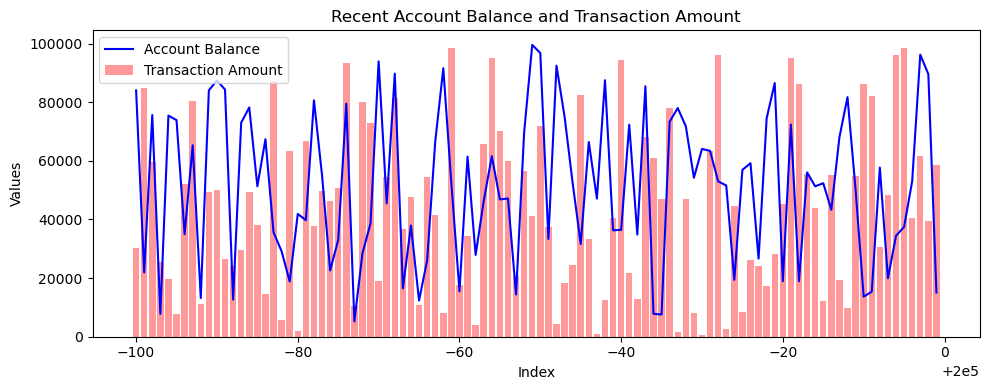

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))
plt.plot(df['Account_Balance'].tail(100), label='Account Balance', color='blue')
plt.bar(df.index[-100:], df['Transaction_Amount'].tail(100), label='Transaction Amount', color='red', alpha=0.4)
plt.title("Recent Account Balance and Transaction Amount")
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()
